In [1]:
import numpy as np
import pandas as pd
from time import process_time
import matplotlib.pyplot as plt

### Vezirlerin yerlerinin costlarını hesaplar

In [2]:
def cost_hesaplama(vezir_yerler):
    cost=0
    for i in range(8):
        
        
        for j in range(1,8-i):
            if vezir_yerler[i+j]==vezir_yerler[i]:
                cost+=1
            if vezir_yerler[i]+j<=7 :
                if vezir_yerler[i+j]==vezir_yerler[i]+j:
                    cost+=1
            if vezir_yerler[i]-j>=0 :
                if vezir_yerler[i+j]==vezir_yerler[i]-j:
                    cost+=1
    return cost 


### Yerleri verilen vezirlerin ve onların costunu bulan fonksiyon

In [3]:
def cost_matris_doldur(cost,cost_matris,vezir_yerler):
    for i in range(8):
        cost_matris[vezir_yerler[i]][i]=cost
    return cost_matris



### Tüm tahtanın o anki durumda vezirlerin sütundaki yerlerini değiştirerek costunu hesaplama

In [4]:
def tahta_costu(vezir_yerler,cost_matris): 
    for i in range(8):
        temp=vezir_yerler[i]
        for j in range(8):
            vezir_yerler[i]=j
            cost=cost_hesaplama(vezir_yerler)
            cost_matris=cost_matris_doldur(cost,cost_matris,vezir_yerler)
        vezir_yerler[i]=temp
        if i == 7: # vezirlerin ilk baştaki yerine koymak için
            cost=cost_hesaplama(vezir_yerler)
            cost_matris=cost_matris_doldur(cost,cost_matris,vezir_yerler)
    return cost_matris

### Cost tableda gideceği yer için fonksiyon

In [5]:
def vezir_move(cost_matris,vezir_yerler):
    optimal_hareket_index=np.where(cost_matris==cost_matris.min()) 
    # vezirin olduğu sütundaki gideceği yer (minimum cost olan yer)
    random=np.random.randint(0,len(optimal_hareket_index[0]))
    vezir_yerler[optimal_hareket_index[1][random]]=optimal_hareket_index[0][random]
    return vezir_yerler

### Satranç tahtasını görselleştiren fonksiyon

In [6]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['k', 'w', 'r'])



def tahta_gorsellestir(vezir_yerler):
    tahta=np.zeros((8,8)).astype(int)
    
    for i in range (8):
        for j in range (8):
            if (i +j)%2==0:
                tahta[i][j]=1
            else:
                tahta[i][j]=0
    frame=pd.DataFrame(tahta)
    
    for i in range(8):
        frame[i][vezir_yerler[i]]=2
        
    frame.columns=["A","B","C","D","E","F","G","H"]
    frame.index=[1,2,3,4,5,6,7,8]
    
   
    plt.matshow(frame,cmap=cmap)
    



### 8 vezir problemine Hill Climbing yöntemi uygulanımı

ÇÖZÜLEN 20 SATRANÇ TAHTASI
_______________________________


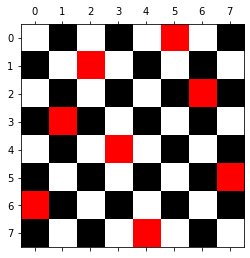

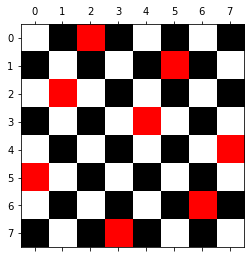

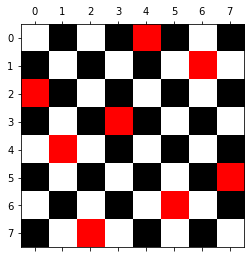

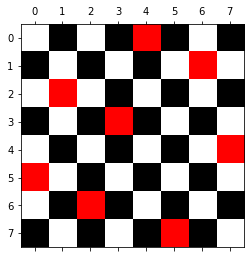

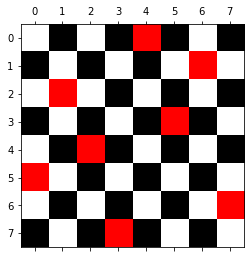

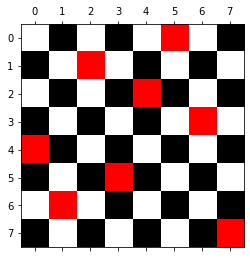

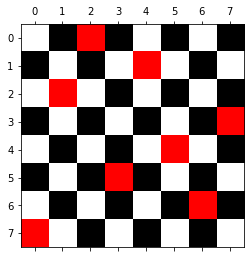

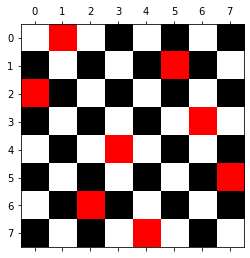

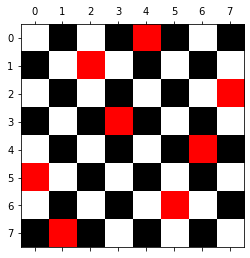

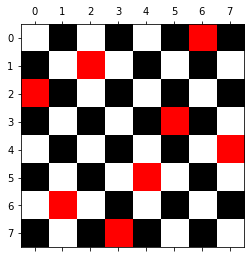

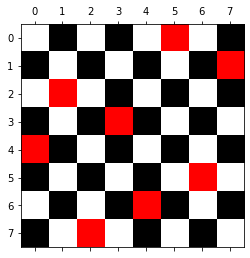

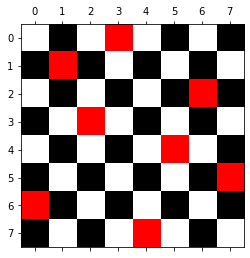

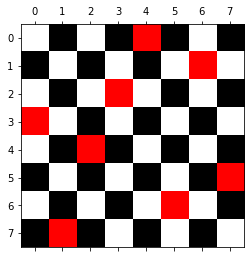

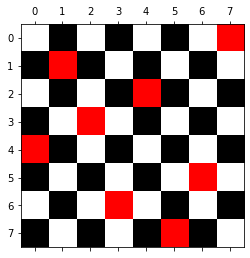

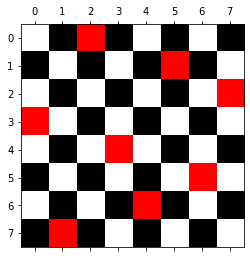

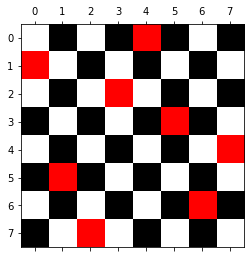

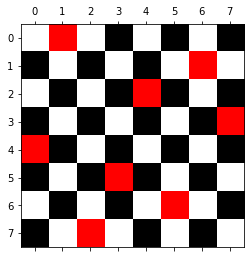

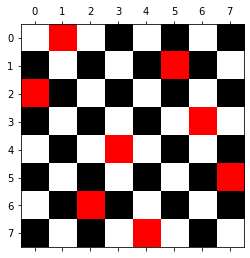

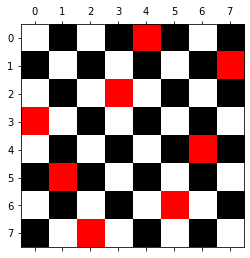

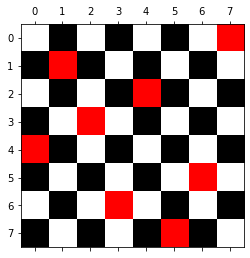

In [20]:
data=np.zeros((21,3))
def climb(i):
    tic = process_time()
    random_restart_count=0
    step_count=0
    time=0
    vezir_yerler=np.random.randint(0,8,8)
    cost_matris=np.zeros((8,8))
    vezir_yerler_previous=np.zeros(8)
    while (cost_hesaplama(vezir_yerler)!=0) :
        step_count+=1
        cost_matris=tahta_costu(vezir_yerler,cost_matris)
        vezir_yerler_previous=vezir_yerler.copy()
        vezir_yerler=vezir_move(cost_matris,vezir_yerler) 
        if  np.array_equal(vezir_yerler,vezir_yerler_previous): 
            # Vezirlerin yeri değişmediyse lokal maksimumda kalmış demektir
            # Bu yüzden random restartla lokal maksimumdan kurtarıyoruz
            random_restart_count+=1
            vezir_yerler=np.random.randint(0,8,8)
    toc = process_time()
    data[i][0]=step_count
    data[i][1]=random_restart_count
    data[i][2]=toc - tic
    tahta_gorsellestir(vezir_yerler)
for i in range(20):
    climb(i)
tablo=pd.DataFrame(data)
tablo.iloc[20,:]=tablo.mean() #21. indexi ortalama değerleri yazdırıyoruz.
tablo.columns=["Adım Sayısı","Random Restart Sayısı","İşlem Süresi (s)"]

print("ÇÖZÜLEN 20 SATRANÇ TAHTASI" "\n_______________________________")

## BİZDEN İSTENEN TABLO

In [21]:
tablo

,Adım Sayısı,Random Restart Sayısı,İşlem Süresi (s)
0,28.000000,5.000000,0.140625
1,99.000000,20.000000,0.453125
2,6.000000,0.000000,0.031250
3,11.000000,2.000000,0.046875
4,11.000000,2.000000,0.046875
5,82.000000,16.000000,0.375000
6,39.000000,8.000000,0.187500
7,41.000000,8.000000,0.203125
8,20.000000,4.000000,0.093750
9,8.000000,1.000000,0.031250
